# IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EXTRACTING THE USEFUL FEATURES FROM THE TITANIC DATA SET 

In [4]:
new_df=df[['survived','pclass','parch']]

In [5]:
new_df

,survived,pclass,parch
0,0,3,0
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,0
...,...,...,...
886,0,2,0
887,1,1,0
888,0,3,2
889,1,1,0


In [6]:
new_df.isnull().sum()

survived    0
pclass      0
parch       0
dtype: int64

In [7]:
new_df.duplicated().sum()

865

In [8]:
distinct_df=new_df.drop_duplicates()

In [9]:
distinct_df.head()

,survived,pclass,parch
0,0,3,0
1,1,1,0
2,1,3,0
6,0,1,0
7,0,3,1


In [10]:
x=distinct_df.iloc[:,1:]
y=distinct_df.iloc[:,0:1]

# TRAIN TEST SPLIT OPERATION

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
x_train

,pclass,parch
167,3,4
7,3,1
1,1,0
0,3,0
86,3,3
10,3,1
148,2,2
25,3,5
6,1,0
88,1,2


In [14]:
y_train

,survived
167,0
7,0
1,1
0,0
86,0
10,1
148,0
25,1
6,0
88,1


In [15]:
x_test

,pclass,parch
59,3,2
858,3,3
678,3,6
438,1,4
13,3,5
437,2,3


In [16]:
y_test

,survived
59,0
858,1
678,0
438,0
13,0
437,1


# STANDARDIZATION USING STANDARD SCALER

In [17]:
from sklearn.preprocessing import StandardScaler 

In [18]:
ss=StandardScaler()


In [19]:
x_train_scaled=ss.fit(x_train)

THIS WILL CALCULATE THE MEAN AND STANDARD DEVIATION OF EACH FEATURES

In [20]:
x_train_scaled

StandardScaler()

In [21]:
x_train.mean()

pclass    2.1
parch     1.4
dtype: float64

In [22]:
x_train_scaled.mean_

array([2.1, 1.4])

In [23]:
x_train.describe()

,pclass,parch
count,20.000000,20.000000
mean,2.100000,1.400000
std,0.852242,1.391705
min,1.000000,0.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,3.000000,5.000000


# APPLY TRANSFORMATION IN BOTH TRAIN AND TEST DATA SET

In [24]:
x_train_scaled=ss.transform(x_train)
x_test_scaled=ss.transform(x_test)

In [25]:
x_train_scaled,x_test_scaled

(array([[ 1.08347268,  1.91674543],
        [ 1.08347268, -0.29488391],
        [-1.32424438, -1.03209369],
        [ 1.08347268, -1.03209369],
        [ 1.08347268,  1.17953565],
        [ 1.08347268, -0.29488391],
        [-0.12038585,  0.44232587],
        [ 1.08347268,  2.65395521],
        [-1.32424438, -1.03209369],
        [-1.32424438,  0.44232587],
        [-1.32424438,  0.44232587],
        [-0.12038585, -0.29488391],
        [-0.12038585, -1.03209369],
        [ 1.08347268,  0.44232587],
        [-1.32424438, -0.29488391],
        [ 1.08347268, -1.03209369],
        [-0.12038585,  0.44232587],
        [-0.12038585, -0.29488391],
        [-1.32424438, -0.29488391],
        [-0.12038585, -1.03209369]]),
 array([[ 1.08347268,  0.44232587],
        [ 1.08347268,  1.17953565],
        [ 1.08347268,  3.39116499],
        [-1.32424438,  1.91674543],
        [ 1.08347268,  2.65395521],
        [-0.12038585,  1.17953565]]))

# CONVERT THIS NUMPY ARRAY INTO DATA FRAME

In [26]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [27]:
x_train_scaled.describe().round(1)

,pclass,parch
count,20.0,20.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.3,-1.0
25%,-1.3,-1.0
50%,-0.1,-0.3
75%,1.1,0.4
max,1.1,2.7


# APPLY NORMALIZATION

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms=MinMaxScaler()

In [30]:
x_train_mms=mms.fit(x_train)

In [31]:
x_train_mms

MinMaxScaler()

In [32]:
x_train_mms_scaled=mms.transform(x_train)
x_test_mms_scaled=mms.transform(x_test)

In [33]:
x_train_mms_scaled,x_test_mms_scaled

(array([[1. , 0.8],
        [1. , 0.2],
        [0. , 0. ],
        [1. , 0. ],
        [1. , 0.6],
        [1. , 0.2],
        [0.5, 0.4],
        [1. , 1. ],
        [0. , 0. ],
        [0. , 0.4],
        [0. , 0.4],
        [0.5, 0.2],
        [0.5, 0. ],
        [1. , 0.4],
        [0. , 0.2],
        [1. , 0. ],
        [0.5, 0.4],
        [0.5, 0.2],
        [0. , 0.2],
        [0.5, 0. ]]),
 array([[1. , 0.4],
        [1. , 0.6],
        [1. , 1.2],
        [0. , 0.8],
        [1. , 1. ],
        [0.5, 0.6]]))

In [34]:
x_train_mms_scaled_df=pd.DataFrame(x_train_mms_scaled,columns=x_train.columns)
x_test_mms_scaled_df=pd.DataFrame(x_test_mms_scaled,columns=x_test.columns)

In [35]:
x_train_mms_scaled_df.describe()

,pclass,parch
count,20.000000,20.000000
mean,0.550000,0.280000
std,0.426121,0.278341
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.500000,0.200000
75%,1.000000,0.400000
max,1.000000,1.000000


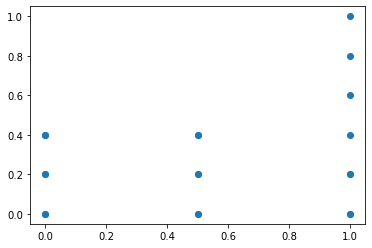

In [38]:
plt.scatter(x_train_mms_scaled_df['pclass'],x_train_mms_scaled_df['parch'])